In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

from plot_conv_seperate import plot_map

In [85]:
def plot_legend(styles, result_dir=None):
    # Plot the legend
    i = 0
    for style in styles:
        fig, ax = plt.subplots()
        # Create custom lines that will be used as legend entries
        custom_lines = [Line2D([0], [0], **style_element) for keys, style_element in style.items()]
       
        ax.axis('off')
        
        #ax.legend(custom_lines, style.keys(), loc='center')
        # Create the legend from the line objects
        legend = plt.legend(custom_lines, style.keys(), loc='center')

        plt.tight_layout()
        
        # Set the figure size to fit the legend, adjust as needed
        fig.set_size_inches(1.5,1.5)

        plt.savefig(result_dir+"_{}.svg".format(i), format="svg", bbox_inches='tight', transparent=True, pad_inches=0, bbox_extra_artists=[legend])
        plt.savefig(result_dir+"_{}.png".format(i), dpi=200, bbox_inches='tight', transparent=True, pad_inches=0, bbox_extra_artists=[legend])
        i += 1 # different style part
    #ax.set_title('Actions [v, $\omega$] \nof both agents')

In [86]:
def plot_q_values(ax1, ax11, data_frame, styles):
    ax1.set_facecolor('white')

    # Group the DataFrame by 'agent' and 'action'
    grouped = data_frame.groupby(['agent', 'action', 'num_iter'])

    #print(grouped)

    # Plot payoff_mean data
    #for (agent, action, num_iter), group in grouped:
    
    ax1.plot(grouped['num_iter'], grouped['payoff'].mean()/grouped['num_iter'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])

    # Change labels and scales
    ax1.set_xticks(np.arange(100, 5000, step=500))

    # Adding labels and title
    ax1.set_xlabel(r'$n_{iter}$')
    ax1.set_ylabel('$\overline{Q}$($n_{iter}$)')

    # Plot the runtime data
    for (agent, action, num_iter), group in grouped:
        ax11.plot(num_iter, group['runtime'].mean(), label='runtime', **styles['runtime'])
        ax11.set_ylabel('Runtime (in sec)')
        break

In [138]:
def plot_num_values(ax1, ax11, data_frame, styles):
    ax1.set_facecolor('white')

    plot_data_frame = pd.DataFrame()

    # Group the DataFrame by 'agent' and 'action'
    grouped = data_frame.groupby(['agent', 'action', 'num_iter'])

    for (agent, action, num_iter), group in grouped:
        new_row = {'num_iter': num_iter,
               'num_count_normalized': group['num_count_normalized'].mean(),
               'runtime': group['runtime'].mean(),
               'agent': agent,
               'action': action}
        new_row = pd.DataFrame(new_row, index=[0])
        plot_data_frame = pd.concat([plot_data_frame, new_row], ignore_index=True)

    # Plot payoff_mean data
    #ax1.plot(plot_data_frame['num_iter'], plot_data_frame['num_count']/plot_data_frame['num_iter'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])
    
    plot_grouped = plot_data_frame.groupby(['agent', 'action'])

    for (agent, action), group in plot_grouped:
        ax1.plot(group['num_iter'], group['num_count_normalized'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])

    # Change labels and scales
    ax1.set_xticks(np.arange(100, 5000, step=500))

    # Adding labels and title
    ax1.set_xlabel(r'$n_{iter}$')
    ax1.set_ylabel('$\overline{n_{count}/n_{iter}}$')

    for (agent, action), group in plot_grouped:
        ax11.plot(group['num_iter'], group['runtime'], label='runtime', **styles['runtime'])
        ax11.set_ylabel('Runtime (in sec)')
        # Set the limits of the y-axis based on the data
        y_min = group['runtime'].min()
        y_max = group['runtime'].max()
        ax11.set_ylim([y_min, y_max])
        break

In [139]:
def plot_variance(ax, ax11, data_frame, styles):
    ax.set_facecolor('white')

    plot_data_frame = pd.DataFrame()

    # Group the DataFrame by 'agent' and 'action'
    grouped = data_frame.groupby(['agent', 'action', 'num_iter'])

    for (agent, action, num_iter), group in grouped:
        new_row = {'num_iter': num_iter,
                   'num_count_normalized': group["num_count_normalized"].var(),
                   'agent': agent,
                   'action': action}
        new_row = pd.DataFrame(new_row, index=[0])
        plot_data_frame = pd.concat([plot_data_frame, new_row], ignore_index=True)

    # Plot variance data
    plot_grouped = plot_data_frame.groupby(['agent', 'action'])

    for (agent, action), group in plot_grouped:
        ax.plot(group['num_iter'], group['num_count_normalized'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])

    # Change labels and scales
    #ax.set_yscale('log')
    ax.set_xticks(np.arange(100, 5000, step=500))

    # Adding labels
    ax.set_xlabel(r'$n_{iter}$')
    ax.set_ylabel('Var($n_{visit}$/$n_{iter})$')

In [6]:
### Intersection Informed DUCT

# Configuration
main_exp = "01_intersection"
exp_name = "duct"
data_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

input_dir_raw = os.path.join(main_dir, "data_raw", main_exp, exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/", main_exp)

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 2 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 2
num_actions_1 = 2

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
#markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, 0.0]': {'color': orange_colors[0], 'marker': 'o'},
    '0: [1.0, 0.0]': {'color': orange_colors[1], 'marker': '^'},
}
styles_1 = {
    '1: [0.0, 0.0]': {'color': blue_colors[0], 'marker': 'o'},
    '1: [1.0, 0.0]': {'color': blue_colors[1], 'marker': '^'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/01_intersection/duct
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/01_intersection/duct


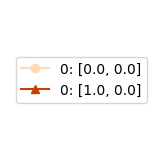

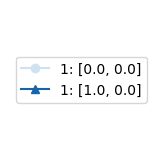

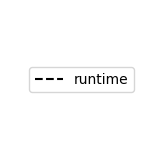

In [7]:
#plot legend seperately
plot_legend([styles_0, styles_1, styles_runtime], result_dir = os.path.join(result_dir,exp_name));

In [9]:
df = pd.read_csv(os.path.join(input_dir_processed, "statistic_data.csv"))

for weight_final in df['weight_final'].unique():   
    game_length=2
    filtered_df = df[(df['game_length'] == game_length) & (df['weight_final'] == weight_final)]
    
    plot_functions = [plot_q_values, plot_variance, plot_num_values]
    plot_args = [(filtered_df, styles), (filtered_df, styles), (filtered_df, styles)]
    plot_names = ['Q-values averaged over 10 runs', 'Variance of Q-values', 'Number of taken action in MCTS']
    fig_sizes = [(6, 5), (6, 5), (6, 5)]


    for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
        fig, ax = plt.subplots(figsize=fig_size)
        ax11 = ax.twinx()
        plot_func(ax, ax11, *plot_arg)
        #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
        #fig.suptitle(title_text, fontsize=12, fontweight='bold')

        # Save the plot
        plt.tight_layout()
        #plt.show()
        try:
            print(result_dir+"/"+exp_name+"/{}-{}.svg".format(game_length, plot_name))
            plt.savefig(result_dir+"/"+exp_name+"/wf_{}-{}.svg".format(weight_final, plot_name), format="svg", bbox_inches='tight')
            plt.savefig(result_dir+"/"+exp_name+"/wf_{}-{}.png".format(weight_final, plot_name), dpi=200)
            #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
            print("Saved plot for game length: ", game_length)
        
        except:
            continue
        plt.close()
    


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Variance of Q-values.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Number of taken action in MCTS.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Variance of Q-values.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Number of taken action in MCTS.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Q-values averaged over 10 runs.svg
Saved plot for 

In [10]:
### Intersection Informed EXP3

# Configuration
main_exp = "01_intersection"
exp_name = "exp3"
data_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

input_dir_raw = os.path.join(main_dir, "data_raw", main_exp, exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/", main_exp)

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 2 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 2
num_actions_1 = 2

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
#markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, 0.0]': {'color': orange_colors[0], 'marker': 'o'},
    '0: [1.0, 0.0]': {'color': orange_colors[1], 'marker': '^'},
}
styles_1 = {
    '1: [0.0, 0.0]': {'color': blue_colors[0], 'marker': 'o'},
    '1: [1.0, 0.0]': {'color': blue_colors[1], 'marker': '^'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/01_intersection/exp3
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/01_intersection/exp3


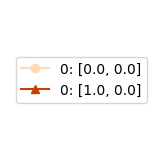

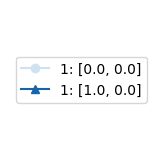

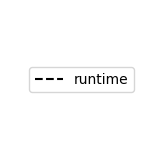

In [11]:
#plot legend seperately
plot_legend([styles_0, styles_1, styles_runtime], result_dir = os.path.join(result_dir,exp_name));

In [13]:
df = pd.read_csv(os.path.join(input_dir_processed, "statistic_data.csv"))

for weight_final in df['weight_final'].unique():
    game_length=2
    for gamma_exp3 in df['gamma_exp3'].unique():
        filtered_df = df[(df['game_length'] == game_length) & (df['gamma_exp3'] == gamma_exp3) & (df['weight_final'] == weight_final)]
        
        plot_functions = [plot_q_values, plot_variance, plot_num_values]
        plot_args = [(filtered_df, styles), (filtered_df, styles), (filtered_df, styles)]
        plot_names = ['Q-values averaged over 10 runs', 'Variance of Q-values', 'Number of taken action in MCTS']
        fig_sizes = [(6, 5), (6, 5), (6, 5)]


        for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
            fig, ax = plt.subplots(figsize=fig_size)
            ax11 = ax.twinx()
            plot_func(ax, ax11, *plot_arg)
            #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
            #fig.suptitle(title_text, fontsize=12, fontweight='bold')

            # Save the plot
            plt.tight_layout()
            #plt.show()
            try:
                print(result_dir+"/"+exp_name+"/{}-{}.svg".format(game_length, plot_name))
                plt.savefig(result_dir+"/"+exp_name+"/wf_{}-gamma_{}-{}.svg".format(weight_final, gamma_exp3, plot_name), format="svg", bbox_inches='tight')
                plt.savefig(result_dir+"/"+exp_name+"/wf_{}-gamma_{}-{}.png".format(weight_final, gamma_exp3, plot_name), dpi=200)
                #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
                print("Saved plot for game length: ", game_length)
                plt.close()
            except:
                continue
           
    


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Variance of Q-values.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Variance of Q-values.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Q-values averaged over 10 runs.svg
Saved plot for 

In [89]:
### Plot DUCT and EXP Together

# Configuration
main_exp = "01_intersection"
exp_name = "duct_vs_exp3"
 
data_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

input_dir_raw_duct = os.path.join(main_dir, "data_raw", main_exp, "duct")
input_dir_raw_exp3 = os.path.join(main_dir, "data_raw", main_exp, "exp3")

input_dir_processed_duct = os.path.join(data_dir, "duct")
input_dir_processed_exp3 = os.path.join(data_dir, "exp3")

result_dir = os.path.join(main_dir, "results/", main_exp)

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))


max_game_length = 2 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 2
num_actions_1 = 2

orange_colors = plt.cm.Oranges(np.linspace(0.8, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.8, 0.8, num_actions_1))

#markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0_duct = {
    '0: [0.0, 0.0]': {'color': orange_colors[1], 'marker': 'o', 'markerfacecolor': 'none', 'markeredgecolor': orange_colors[1]},
    '0: [1.0, 0.0]': {'color': orange_colors[1], 'marker': '^'},
}
styles_1_duct = {
    '1: [0.0, 0.0]': {'color': blue_colors[1], 'marker': 'o', 'markerfacecolor': 'none', 'markeredgecolor': blue_colors[1]},
    '1: [1.0, 0.0]': {'color': blue_colors[1], 'marker': '^'},
}
styles_runtime_duct = {
    'runtime': {'color': 'black'},
}

styles_0_exp3 = {
    '0: [0.0, 0.0]': {'color': orange_colors[0], 'marker': 'o', 'linestyle': '--', 'markerfacecolor': 'none', 'markeredgecolor': orange_colors[0]},
    '0: [1.0, 0.0]': {'color': orange_colors[0], 'marker': '^', 'linestyle': '--'},
}
styles_1_exp3 = {
    '1: [0.0, 0.0]': {'color': blue_colors[0], 'marker': 'o', 'linestyle': '--', 'markerfacecolor': 'none', 'markeredgecolor': blue_colors[0]},
    '1: [1.0, 0.0]': {'color': blue_colors[0], 'marker': '^', 'linestyle': '--'},
}
styles_runtime_exp3 = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles_duct = {**styles_0_duct, **styles_1_duct, **styles_runtime_duct}
styles_exp3 = {**styles_0_exp3, **styles_1_exp3, **styles_runtime_exp3}


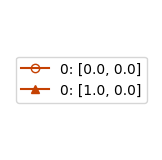

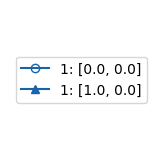

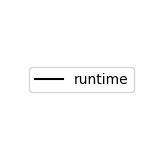

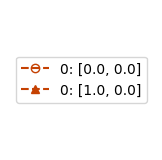

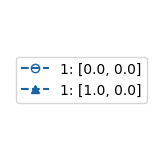

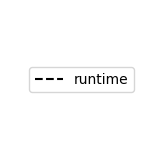

In [90]:
#plot legend seperately
plot_legend([styles_0_duct, styles_1_duct, styles_runtime_duct], result_dir = os.path.join(result_dir,exp_name,"legend_style_duct"))
plot_legend([styles_0_exp3, styles_1_exp3, styles_runtime_exp3], result_dir = os.path.join(result_dir,exp_name, "legend_style_exp3"))


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


/tmp/ipykernel_2144733/3507372075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
/tmp/ipykernel_2144733/3507372075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Variance of num_counts.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct_vs_exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2


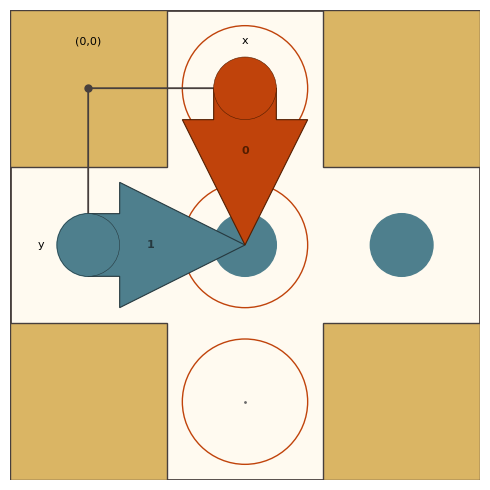

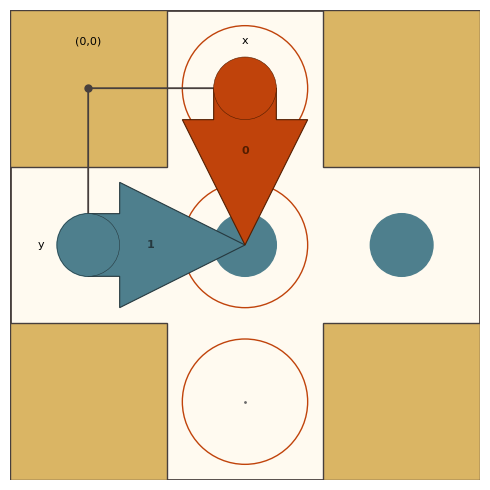

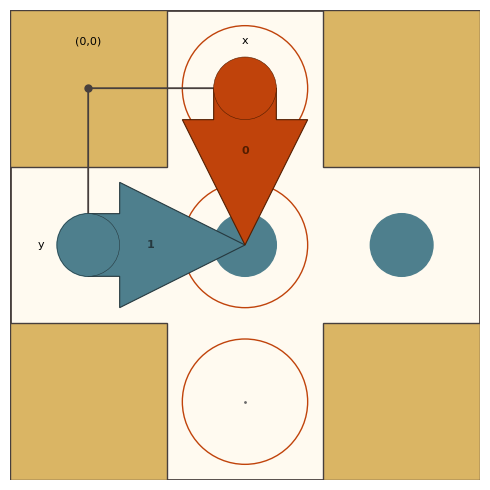

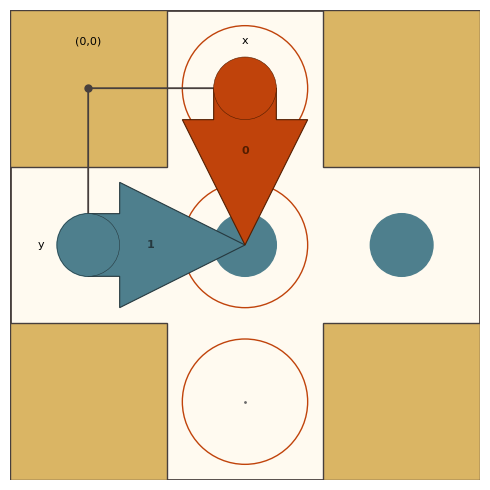

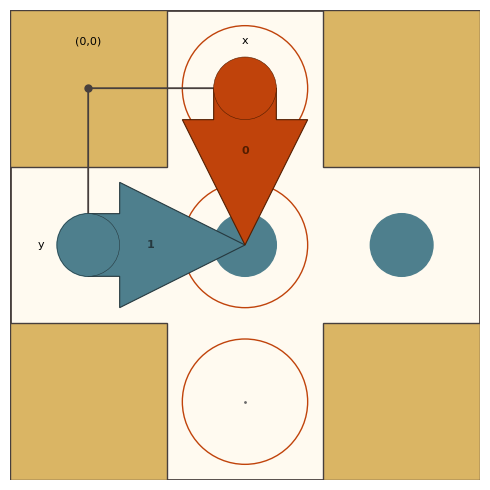

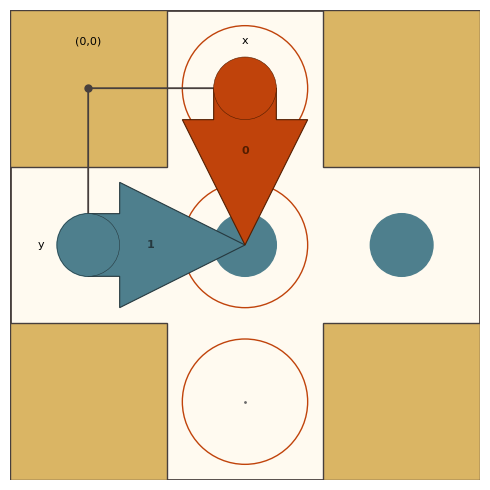

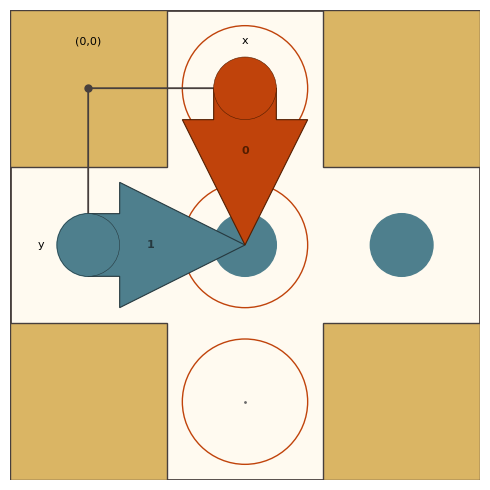

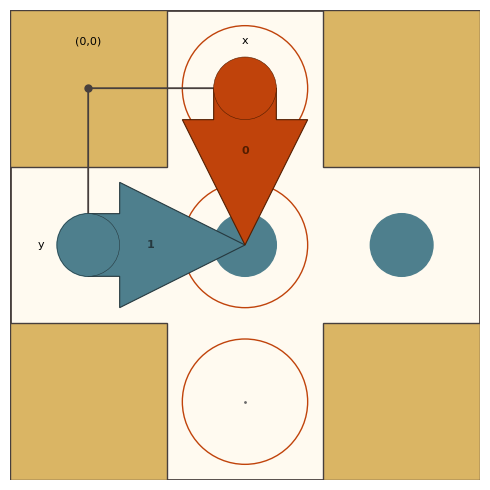

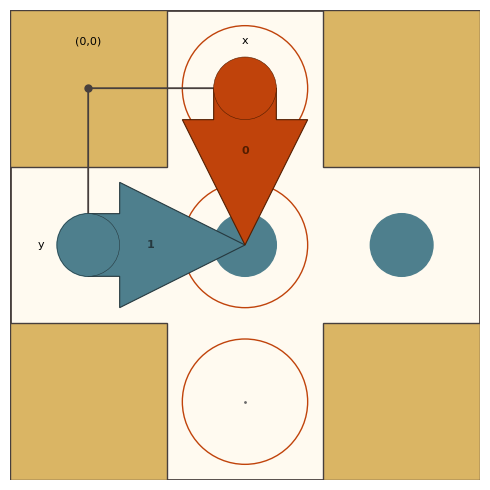

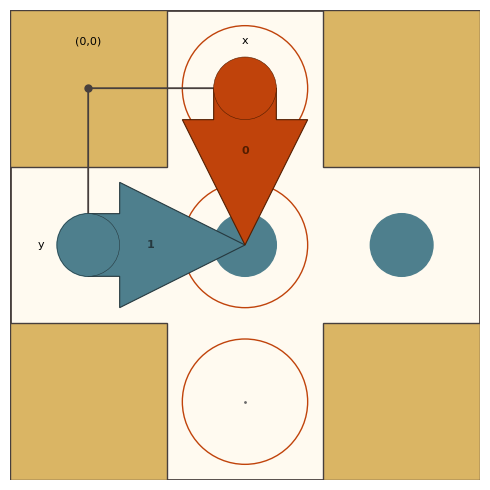

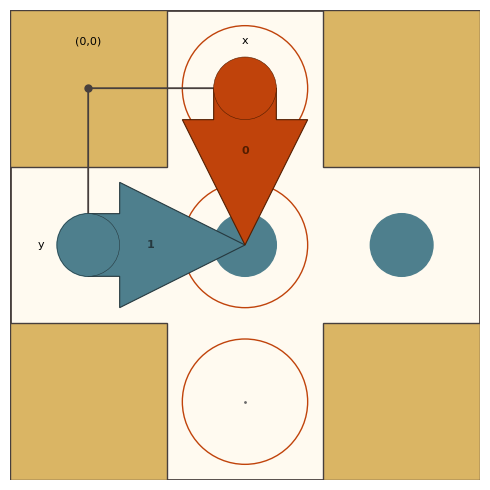

In [140]:
df_duct = pd.read_csv(os.path.join(input_dir_processed_duct, "statistic_data.csv"))
df_exp3 = pd.read_csv(os.path.join(input_dir_processed_exp3, "statistic_data.csv"))


for weight_final in df_duct['weight_final'].unique():   
    game_length=2 #initial decision
    gamma_exp3 = 0.1

    # filter data frames
    filtered_df_duct = df_duct[(df_duct['game_length'] == game_length) & (df_duct['weight_final'] == weight_final)]
    filtered_df_exp3 = df_exp3[(df_exp3['game_length'] == game_length) & (df_exp3['gamma_exp3'] == gamma_exp3) & (df_exp3['weight_final'] == weight_final)]
    filtered_df_duct['num_count_normalized'] = filtered_df_duct['num_count'] / filtered_df_duct['num_iter']
    filtered_df_exp3['num_count_normalized'] = filtered_df_exp3['num_count'] / filtered_df_exp3['num_iter']
    
    #print(filtered_df_duct)

    plot_functions = [plot_variance, plot_num_values]
    plot_args_duct = [(filtered_df_duct, styles_duct), (filtered_df_duct, styles_duct)]
    plot_args_exp3 = [(filtered_df_exp3, styles_exp3), (filtered_df_exp3, styles_exp3)]
    plot_names = ['Variance of num_counts', 'Number of taken action in MCTS']
    fig_sizes = [(6, 5), (6, 5)]

    fig_map, ax_map = plt.subplots(figsize=(10, 5))
    plot_map(ax_map, input_dir_raw_duct, game_length)
    plt.tight_layout()
    plt.savefig(result_dir+"/"+exp_name+"/{}-{}.svg".format(game_length, "map"), format="svg", bbox_inches='tight')
    plt.savefig(result_dir+"/"+exp_name+"/{}-{}.png".format(game_length, "map"), dpi=200)


    for plot_func, plot_arg_duct, plot_args_exp3, plot_name, fig_size in zip(plot_functions, plot_args_duct, plot_args_exp3, plot_names, fig_sizes):
        fig, ax = plt.subplots(figsize=fig_size)
        ax11 = ax.twinx()
        plot_func(ax, ax11, *plot_arg_duct)
        plot_func(ax, ax11, *plot_args_exp3)
        #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
        #fig.suptitle(title_text, fontsize=12, fontweight='bold')

        # Save the plot
        plt.tight_layout()
        #plt.show()
        try:
            print(result_dir+"/"+exp_name+"/{}-{}.svg".format(game_length, plot_name))
            plt.savefig(result_dir+"/"+exp_name+"/wf_{}-{}.svg".format(weight_final, plot_name), format="svg", bbox_inches='tight')
            plt.savefig(result_dir+"/"+exp_name+"/wf_{}-{}.png".format(weight_final, plot_name), dpi=200)
            #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
            print("Saved plot for game length: ", game_length)
        
        except:
            continue
        plt.close()